In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# here we will deal with outliers 
# An outlier is an observation in a given dataset that lies far
# from the rest of the observations

In [4]:
# Here we will remove outliers using the Z-score
# this method is used when the data has a Normal distribution
# in Normal distribution mean,median,mode are all equal and situated at the center
# there is a emperical rule in Normal Distribution that :
# 1)that 68% of the data falls within one std dev from the mean(µ-ɑ and µ+ɑ)
# 2)that 95% of the data falls within two std dev from the mean(µ-2ɑ and µ+2ɑ)
# 3)that 99.7% of the data falls within three std dev from the mean(µ-3ɑ and µ+3ɑ)
# therfore from here we can conclude that values outside the interval µ-3ɑ and µ+3ɑ are
# outliers

In [5]:
data = pd.read_csv('csv_files\scholarship.csv')

In [6]:
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [7]:
df = data.copy()

In [8]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [9]:
df.shape

(1000, 3)

C:\Users\RETAM\AppData\Local\Temp\ipykernel_4176\1737763189.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['semester_percentage'])
C:\Users\RETAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RETAM\AppData\Local\Temp\ipykernel_4176\1737763189.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar 

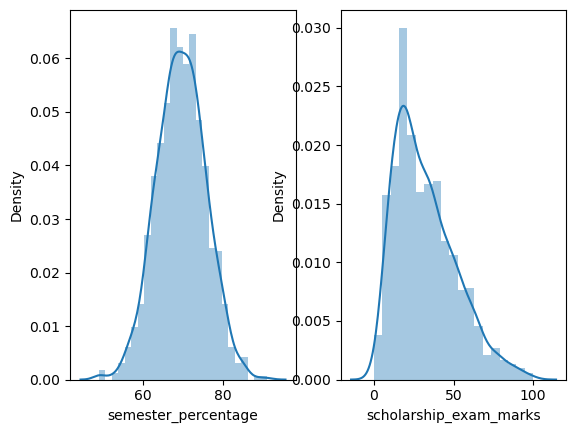

In [10]:
plt.subplot(1,2,1)
sns.distplot(df['semester_percentage'])
plt.subplot(1,2,2)
sns.distplot(df['scholarship_exam_marks'])
plt.show()

In [11]:
mean = df['semester_percentage'].mean()
mean

69.6124

In [12]:
std = df['semester_percentage'].std()
std

6.158978751323897

In [13]:
highest_allowed  = mean + 3* std
lowest_allowed = mean - 3*std
(highest_allowed,lowest_allowed)

(88.08933625397168, 51.13546374602831)

In [14]:
# now we will check for values which are outside the range in the above row
df[(df['semester_percentage']>highest_allowed)| (df['semester_percentage']<lowest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


In [15]:
# we can trim the data by removing these rows from the data
df[(df['semester_percentage']<highest_allowed) & (df['semester_percentage']>lowest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [16]:
# the same thing can be done using the z-score
# z = (X-µ)/ɑ 
df['Z_score'] = (df['semester_percentage']-df['semester_percentage'].mean())/df['semester_percentage'].std()

In [17]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [18]:
df[(df['Z_score']>3)|(df['Z_score']<-3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [19]:
df_2 = df[(df['Z_score']<3)&(df['Z_score']>-3)]

<Axes: >

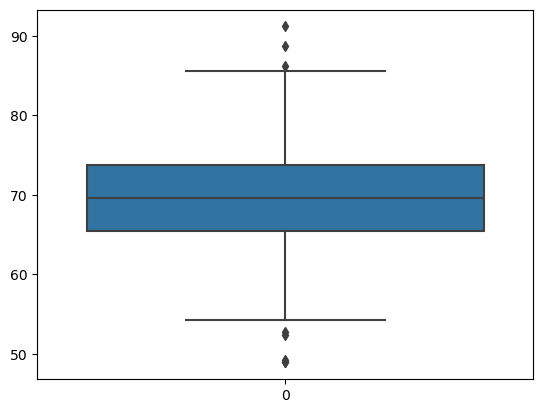

In [20]:
sns.boxplot(df['semester_percentage'])

<Axes: >

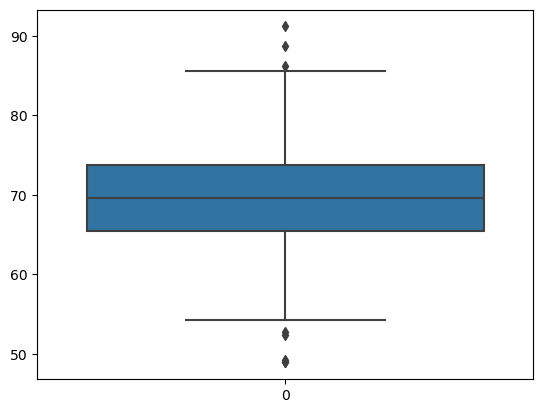

In [21]:
#or we can using the concept of the capping the data
sns.boxplot(df['semester_percentage'])


In [22]:
# we will use the functio np.where(cond,x,y) 
df['semester_percentage'] =np.where(df['semester_percentage']>highest_allowed,highest_allowed,np.where(df['semester_percentage']<lowest_allowed,lowest_allowed,df['semester_percentage']))

In [23]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


<Axes: >

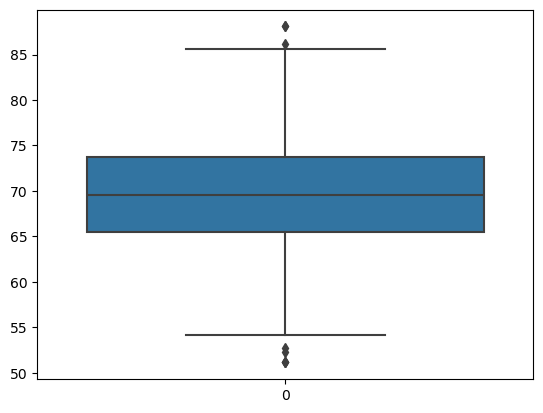

In [24]:
sns.boxplot(df['semester_percentage'])

In [25]:
df[(df['semester_percentage']>highest_allowed) | (df['semester_percentage']<lowest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score


In [26]:
#Method 2-->Interquartile Range
# we use this method when the distribution is a skewed one(distorted from the symmetrical 
# normal distribution)
# here we divide the data distribution into four parts 0-25%,25%-50%,50%-75%,75%-100%
# where Q1=25%,Q2=50%,Q3=75%
# Iterquartile range is,IQR = Q3-Q1 the data range that contains middle 50% of the entries
# Now we will define the way we can identify outliers from the IQR
# data vaues outside the range(Q1-1.5IQR , Q3+1.5IQR) are to be taken as the outliers


C:\Users\RETAM\AppData\Local\Temp\ipykernel_4176\2060931327.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])
C:\Users\RETAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

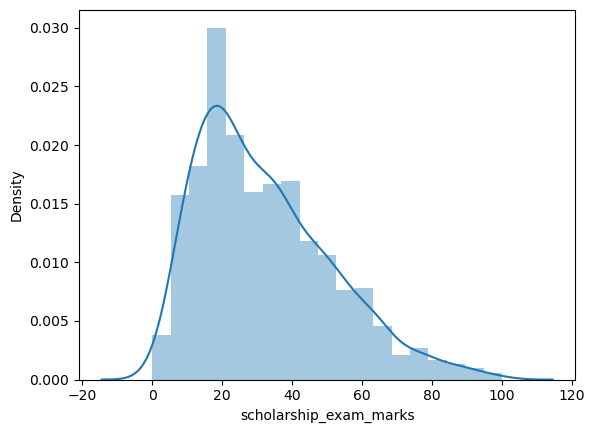

In [27]:
sns.distplot(df['scholarship_exam_marks'])

<Axes: >

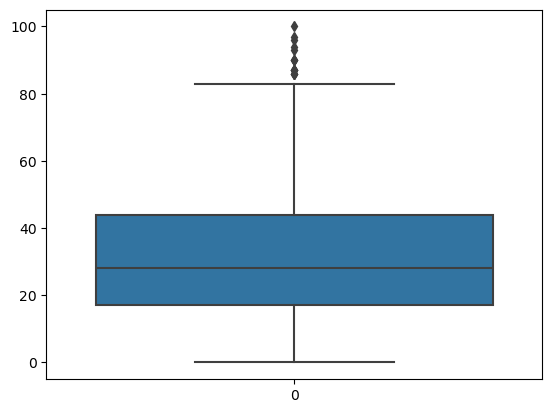

In [28]:
sns.boxplot(df['scholarship_exam_marks'])

In [29]:
Q1 = df['scholarship_exam_marks'].quantile(0.25)
Q3 = df['scholarship_exam_marks'].quantile(0.75)

IQR = Q3-Q1
IQR

27.0

In [30]:
# first we will use the method of trimming to remove the rows with outliers
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
df[(df['scholarship_exam_marks']>upper_limit)|(df['scholarship_exam_marks']<lower_limit)]

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score
9,77.5,94,1,1.280667
40,66.0,86,1,-0.586526
61,75.1,86,0,0.890992
134,63.3,93,0,-1.024910
162,78.0,90,0,1.361849
283,70.9,87,0,0.209061
290,83.8,87,0,2.303564
311,69.7,87,1,0.014223
324,66.4,90,0,-0.521580
630,65.6,96,1,-0.651472


In [31]:
data_1 = df[(df['scholarship_exam_marks']<upper_limit)&(df['scholarship_exam_marks']>lower_limit)]

In [32]:
data_1
data_1[(data_1['scholarship_exam_marks']>upper_limit)|(data_1['scholarship_exam_marks']<lower_limit)]

,semester_percentage,scholarship_exam_marks,got_scholarship,Z_score


C:\Users\RETAM\AppData\Local\Temp\ipykernel_4176\1727146688.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])
C:\Users\RETAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RETAM\AppData\Local\Temp\ipykernel_4176\1727146688.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simil

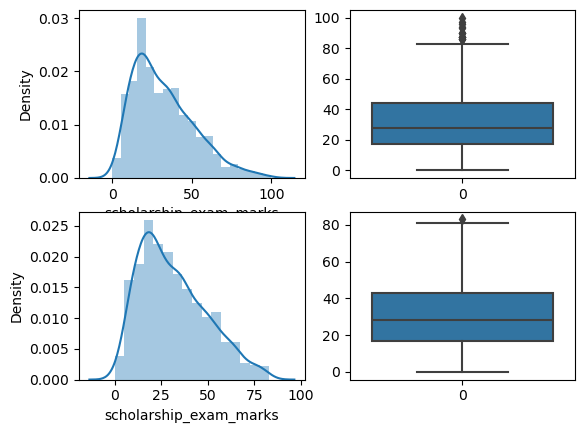

In [33]:
plt.subplot(2,2,1)
sns.distplot(df['scholarship_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['scholarship_exam_marks'])
plt.subplot(2,2,3)
sns.distplot(data_1['scholarship_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(data_1['scholarship_exam_marks'])
plt.show()


In [34]:
df['scholarship_exam_marks'] = np.where(df['scholarship_exam_marks']>upper_limit,upper_limit,np.where(df['scholarship_exam_marks']<lower_limit,lower_limit,df['scholarship_exam_marks']))

<Axes: >

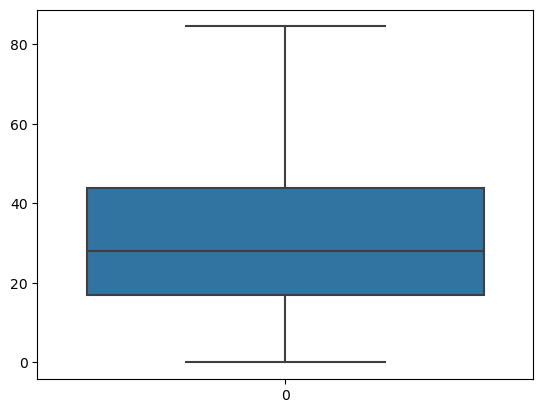

In [35]:
sns.boxplot(df['scholarship_exam_marks'])

C:\Users\RETAM\AppData\Local\Temp\ipykernel_4176\2060931327.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['scholarship_exam_marks'])
C:\Users\RETAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

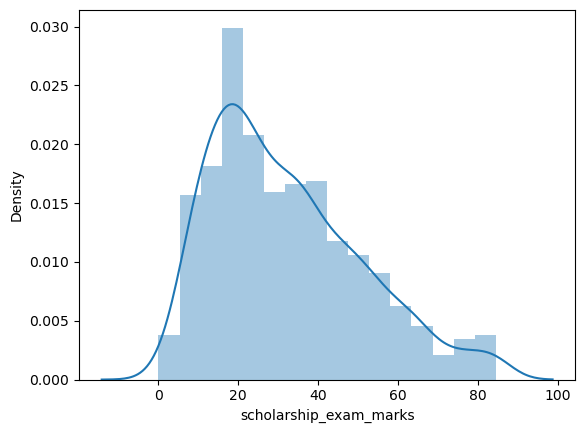

In [36]:
sns.distplot(df['scholarship_exam_marks'])

In [37]:
# in this part we will deal with outliers of data that neither has normal distb nor skewed
# distb, for such data we use the percentile method to deal with outliers

In [53]:
df_1 = pd.read_csv('csv_files\weight-height.csv')
df_1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\RETAM\AppData\Local\Temp\ipykernel_4176\855457955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Height'])
C:\Users\RETAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

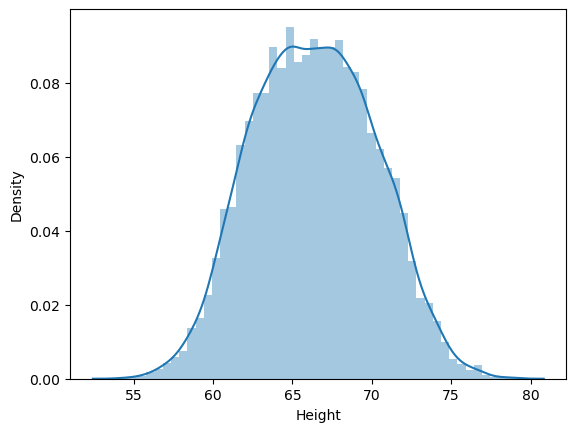

In [50]:
sns.distplot(df_1['Height'])

<Axes: >

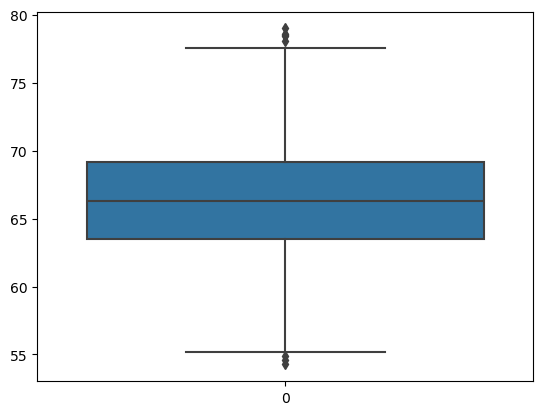

In [51]:
# the above weight data also doesnt have a perfect normal distb
# to check for oultliers we will use the boxplot
sns.boxplot(df_1['Height'])

In [52]:
# thus here we can see that the data has outliers
df_1['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [56]:
# we will take 1% for the outlier detection
min = df_1['Height'].quantile(0.01)
max = df_1['Height'].quantile(0.99)
(max,min)

(74.7857900583366, 58.13441158671655)

In [58]:
#Trimming the data
data_2 = df_1[(df_1['Height']<max)&(df_1['Height']>min)]

<Axes: >

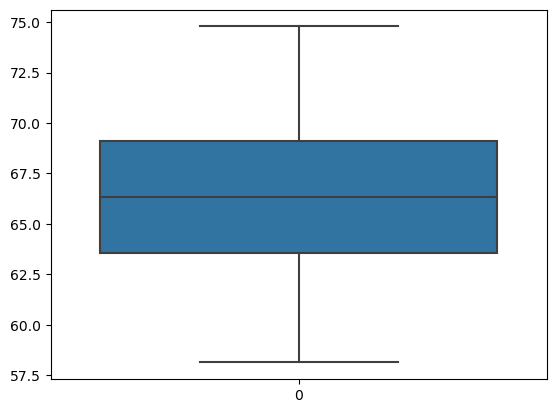

In [59]:
sns.boxplot(data_2['Height'])

C:\Users\RETAM\AppData\Local\Temp\ipykernel_4176\2777536963.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Height'])
C:\Users\RETAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Density'>

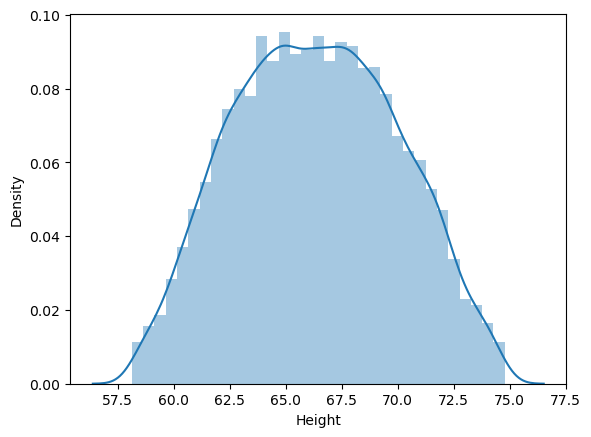

In [60]:
sns.distplot(data_2['Height'])

C:\Users\RETAM\AppData\Local\Temp\ipykernel_4176\982795938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Weight'])
C:\Users\RETAM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Density'>

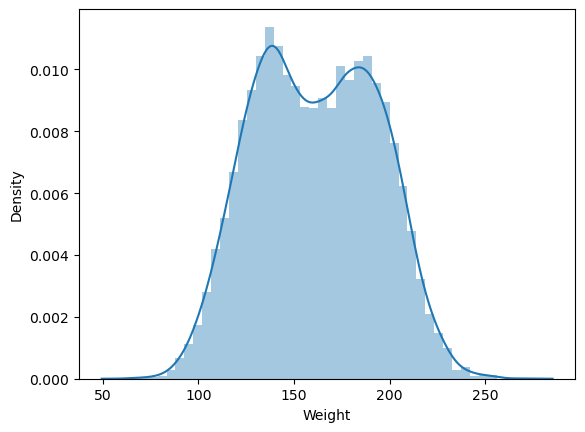

In [42]:
sns.distplot(df_1['Weight'])

<Axes: >

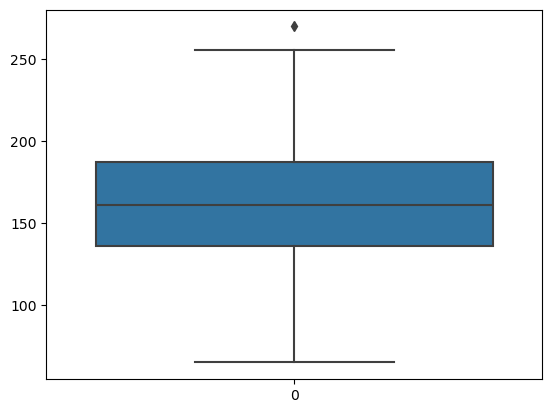

In [61]:
# from here we can see that the weight distb is neither Normal nor skewed,thus the percen
# tile method will have to be used to deal with outliers in the data
sns.boxplot(df_1['Weight'])

In [62]:
df_1['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [63]:
# next we will use capping for the Height data column to deal with the outliers
df_1['Height'] = np.where(df_1['Height']>max,max,np.where(df_1['Height']<min,min,df_1['Height']))

<Axes: >

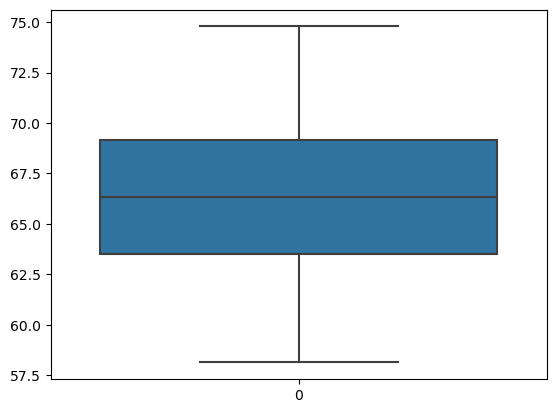

In [64]:
sns.boxplot(df_1['Height'])

In [ ]:
sns.distplot(df_1['Height'])